<a href="https://colab.research.google.com/github/nowkoai/twnow/blob/main/tw1130.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ① Twitterで指定キーワードの検索結果を収集

In [1]:
import tweepy
import pandas as pd
import datetime

In [2]:
###########################################################
# TwitterのAPIキー
# CONSUMER_KEY="CONSUMER_KEYを入力"
# CONSUMER_SECRET="CONSUMER_SECRETを入力"
# ACCESS_TOKEN="ACCESS_TOKENを入力"
# ACCESS_SECRET="ACCESS_SECERETを入力"
###########################################################
CONSUMER_KEY = "yztgyvy3xyTeSosk943q7bnc6" 
CONSUMER_SECRET = "75vv9XCdcESdxoo4hklsPsXzfrV2nI03zFpyWMkQmPL1VqxmPI"
ACCESS_TOKEN = "47510503-U3D5i7OBgyW4aqXmXmvUSBL7WQj7pTubq16d302tG"
ACCESS_SECRET = "QwEtliGBSz4lC4pEQIjl4gL4zsBrbT6nOgmazVdEEiI5k"

In [3]:
# Twitter APIインスタンス作成
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
api = tweepy.API(auth)

In [4]:
# Twitterの検索キーワード（リツィート、リプライを除く）
q = f"自民党 exclude:retweets -filter:replies"

In [5]:
# Tweetデータを格納するリスト
tweet_data = []

# Tweetデータの取得（ID/ユーザー名/★Tweerデータ/Text/いいね数/リツィート数）
for tweet in tweepy.Cursor(api.search, q=q, result_type='recent',locale="ja",lang="ja",include_entities=False,count=100).items(100):
    tweet_data.append([tweet.id_str,
                       tweet.user.screen_name,
                       tweet.created_at+datetime.timedelta(hours=9),
                       tweet.text.replace('\n',''),
                       tweet.favorite_count,
                       tweet.retweet_count])

In [6]:
# カラムを280文字幅に設定
pd.set_option("display.max_colwidth", 280)

In [7]:
# データ列名
columns_name=["TW_NO","USER_NAME","TW_TIME","TW_TEXT","FAV","RT"]
#データフレーム化
df=pd.DataFrame(tweet_data,columns=columns_name)

In [8]:
df

,TW_NO,USER_NAME,TW_TIME,TW_TEXT,FAV,RT
0,1468139844572692480,ugogg,2021-12-07 17:46:30,わたしが自民党の偉い人だったら「ロックだ（な）」って言葉遣いを徹底的に規制すると思うので政治家たちは優しいなと思いますよ,0,0
1,1468139599319150595,l2WpeUeDCksblL3,2021-12-07 17:45:31,こんな『#簡単な問題』も、解決できない自民党#文書通信交通滞在費血税に群がる #ハイエナ国会議員税金の甘い汁をむしばむ #シロアリ国会議員自分達の給与、ボーナス、法外な諸手当を半額にして、「#あしなが育英会」等に寄付せ… https://t.co/dtZxuyIJzO,0,0
2,1468139513168162816,bo47360062,2021-12-07 17:45:11,国益ではなく自民党政権の共益の観点から判断して参加します https://t.co/k2FH4IkikN,0,0
3,1468139510676733952,shizuokakonsama,2021-12-07 17:45:10,細野豪志衆院議員（静岡５区）の県連入りを事実上容認 自民党静岡県連（Daiichi-TV（静岡第一テレビ）） https://t.co/M4bIkG0kIT,0,0
4,1468139489017360389,ayukero52,2021-12-07 17:45:05,そうそう。自民党は9条変えて徴兵と敵基地攻撃やりたいのよね。アメリカのために。 https://t.co/ywbxGnFA8j,0,0
...,...,...,...,...,...,...
95,1468134525826117632,harmolodix,2021-12-07 17:25:22,不正の告発を「愛党精神の欠如」とは、よくもそんなことが言えたもんだ。というか、ここに自民党の体質がよく表れている。自民・長岡支部「愛党精神の欠如」 泉田議員の支部長交代を申し入れ(朝日新聞デジタル)#Yahooニュースhttps://t.co/9it54CX7fb,0,0
96,1468134363930181635,mokkouya_gen,2021-12-07 17:24:43,今まで何も考えてなかったってことか。しかも、考えることは結局保管することだろ。活用して在庫減らすこと考えろ。こんなアホばっかの自民党の支持率が高いのが不思議だ「災害用備蓄も検討」アベノマスク含む在庫8千万枚の使い道 厚労相(朝… https://t.co/kDHT8EWJ9f,0,0
97,1468134340270104580,owl__claw,2021-12-07 17:24:37,自民党の方針は法律違反 みんなでやれば問題ない都合の悪い法律は強行採決で変えるものこんなとこかな,2,0
98,1468134304572395520,YasasiihitoniN,2021-12-07 17:24:29,政治資金の使い途 麻生氏は高級車リース336万円、稲田氏は義理チョコ27万円(NEWSポストセブン)#Yahooニュースhttps://t.co/EArkPW3oTF 感覚がおかしくなったのか、元々なのか。#自民党 #麻生,0,0


### ② Twitterデータの前処理

In [9]:
!pip install emoji

     |████████████████████████████████| 170 kB 21.2 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=ecd6731e8b7480a9f8da0f1aeef9ea1980b66b073c1256c30392827309f468cf
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji


In [10]:
# 絵文字を削除
import emoji

def remove_emoji(text):
    return emoji.get_emoji_regexp().sub(u'', text)


# ツイートを整形する（不要な文字を削除する！）
# 形態素解析する前に、必要に応じて追記
def format_df_text(text_col,df):
    df['temp'] = df[text_col].replace(r'https?://[w/:%#$&?()~.=+-…]+', '', regex=True) #画像へのリンクを削除
    df['temp'] = df['temp'].replace(r'@[w/:%#$&?()~.=+-…]+', '', regex=True) #'@'によるメンションを削除
    df['temp'] = df['temp'].replace(r'#(\w+)', '', regex=True) #ハッシュタグ(半角)を削除
    df['temp'] = df['temp'].replace(r'＃(\w+)', '', regex=True) #ハッシュタグ(全角)を削除
    df['temp'] = df['temp'].apply(lambda x: remove_emoji(x)) #🐶のような絵文字を削除
    
    return df['temp']

In [11]:
# Tweetデータの前処理
df['TW_TEXT_mod'] = format_df_text('TW_TEXT',df)

In [12]:
df

,TW_NO,USER_NAME,TW_TIME,TW_TEXT,FAV,RT,temp,TW_TEXT_mod
0,1468139844572692480,ugogg,2021-12-07 17:46:30,わたしが自民党の偉い人だったら「ロックだ（な）」って言葉遣いを徹底的に規制すると思うので政治家たちは優しいなと思いますよ,0,0,わたしが自民党の偉い人だったら「ロックだ（な）」って言葉遣いを徹底的に規制すると思うので政治家たちは優しいなと思いますよ,わたしが自民党の偉い人だったら「ロックだ（な）」って言葉遣いを徹底的に規制すると思うので政治家たちは優しいなと思いますよ
1,1468139599319150595,l2WpeUeDCksblL3,2021-12-07 17:45:31,こんな『#簡単な問題』も、解決できない自民党#文書通信交通滞在費血税に群がる #ハイエナ国会議員税金の甘い汁をむしばむ #シロアリ国会議員自分達の給与、ボーナス、法外な諸手当を半額にして、「#あしなが育英会」等に寄付せ… https://t.co/dtZxuyIJzO,0,0,こんな『』も、解決できない自民党 、ボーナス、法外な諸手当を半額にして、「」等に寄付せ…,こんな『』も、解決できない自民党 、ボーナス、法外な諸手当を半額にして、「」等に寄付せ…
2,1468139513168162816,bo47360062,2021-12-07 17:45:11,国益ではなく自民党政権の共益の観点から判断して参加します https://t.co/k2FH4IkikN,0,0,国益ではなく自民党政権の共益の観点から判断して参加します,国益ではなく自民党政権の共益の観点から判断して参加します
3,1468139510676733952,shizuokakonsama,2021-12-07 17:45:10,細野豪志衆院議員（静岡５区）の県連入りを事実上容認 自民党静岡県連（Daiichi-TV（静岡第一テレビ）） https://t.co/M4bIkG0kIT,0,0,細野豪志衆院議員（静岡５区）の県連入りを事実上容認 自民党静岡県連（Daiichi-TV（静岡第一テレビ））,細野豪志衆院議員（静岡５区）の県連入りを事実上容認 自民党静岡県連（Daiichi-TV（静岡第一テレビ））
4,1468139489017360389,ayukero52,2021-12-07 17:45:05,そうそう。自民党は9条変えて徴兵と敵基地攻撃やりたいのよね。アメリカのために。 https://t.co/ywbxGnFA8j,0,0,そうそう。自民党は9条変えて徴兵と敵基地攻撃やりたいのよね。アメリカのために。,そうそう。自民党は9条変えて徴兵と敵基地攻撃やりたいのよね。アメリカのために。
...,...,...,...,...,...,...,...,...
95,1468134525826117632,harmolodix,2021-12-07 17:25:22,不正の告発を「愛党精神の欠如」とは、よくもそんなことが言えたもんだ。というか、ここに自民党の体質がよく表れている。自民・長岡支部「愛党精神の欠如」 泉田議員の支部長交代を申し入れ(朝日新聞デジタル)#Yahooニュースhttps://t.co/9it54CX7fb,0,0,不正の告発を「愛党精神の欠如」とは、よくもそんなことが言えたもんだ。というか、ここに自民党の体質がよく表れている。自民・長岡支部「愛党精神の欠如」 泉田議員の支部長交代を申し入れ(朝日新聞デジタル),不正の告発を「愛党精神の欠如」とは、よくもそんなことが言えたもんだ。というか、ここに自民党の体質がよく表れている。自民・長岡支部「愛党精神の欠如」 泉田議員の支部長交代を申し入れ(朝日新聞デジタル)
96,1468134363930181635,mokkouya_gen,2021-12-07 17:24:43,今まで何も考えてなかったってことか。しかも、考えることは結局保管することだろ。活用して在庫減らすこと考えろ。こんなアホばっかの自民党の支持率が高いのが不思議だ「災害用備蓄も検討」アベノマスク含む在庫8千万枚の使い道 厚労相(朝… https://t.co/kDHT8EWJ9f,0,0,今まで何も考えてなかったってことか。しかも、考えることは結局保管することだろ。活用して在庫減らすこと考えろ。こんなアホばっかの自民党の支持率が高いのが不思議だ「災害用備蓄も検討」アベノマスク含む在庫8千万枚の使い道 厚労相(朝…,今まで何も考えてなかったってことか。しかも、考えることは結局保管することだろ。活用して在庫減らすこと考えろ。こんなアホばっかの自民党の支持率が高いのが不思議だ「災害用備蓄も検討」アベノマスク含む在庫8千万枚の使い道 厚労相(朝…
97,1468134340270104580,owl__claw,2021-12-07 17:24:37,自民党の方針は法律違反 みんなでやれば問題ない都合の悪い法律は強行採決で変えるものこんなとこかな,2,0,自民党の方針は法律違反 みんなでやれば問題ない都合の悪い法律は強行採決で変えるものこんなとこかな,自民党の方針は法律違反 みんなでやれば問題ない都合の悪い法律は強行採決で変えるものこんなとこかな
98,1468134304572395520,YasasiihitoniN,2021-12-07 17:24:29,政治資金の使い途 麻生氏は高級車リース336万円、稲田氏は義理チョコ27万円(NEWSポストセブン)#Yahooニュースhttps://t.co/EArkPW3oTF 感覚がおかしくなったのか、元々なのか。#自民党 #麻生,0,0,政治資金の使い途 麻生氏は高級車リース336万円、稲田氏は義理チョコ27万円(NEWSポストセブン) 感覚がおかしくなったのか、元々なのか。,政治資金の使い途 麻生氏は高級車リース336万円、稲田氏は義理チョコ27万円(NEWSポストセブン) 感覚がおかしくなったのか、元々なのか。


### ③ TwitterデータをGoogle Drive上に保存する

In [13]:
# # Googleドライブをマウント
# # ★実行すると認証用のURLが表示される → クリックしてアクセス許可の確認すると認証用のコードが表示される
# # → その認証コードを空欄テキストボックスにコピーして、リターンを押すと認証完了して、Googleドライブにアクセスできます！
# from google.colab import drive
# drive.mount('/content/drive')

In [14]:
# # データを保存するディレクトリに移動
# %cd /content/drive/My Drive/Colab Notebooks

In [15]:
# # そのディレクトリで、ファイル一覧を表示
# %ls

In [16]:
file_name='tw_all.csv'

# Twitter全情報をCSV保存
# df.to_csv(file_name,encoding='utf-8-sig',index=False)
df.to_csv(file_name,encoding='utf-8',index=False)

In [17]:
file_name='tw_text_mod.csv'

# Twitterテキスト情報をCSV保存
# df['TW_TEXT_mod'].to_csv(file_name,encoding='utf-8-sig',index=False)
df['TW_TEXT_mod'].to_csv(file_name,encoding='utf-8',index=False)

In [18]:
# ファイル保存じた現在パスを表示
%pwd

'/content'

In [19]:
# 保存ファイル名を確認 --> ★Googleドライブでファイルの中身をご確認ください！
%ls

sample_data/  tw_all.csv  tw_text_mod.csv


In [20]:
!cat tw_text_mod.csv

TW_TEXT_mod
わたしが自民党の偉い人だったら「ロックだ（な）」って言葉遣いを徹底的に規制すると思うので政治家たちは優しいなと思いますよ
こんな『』も、解決できない自民党  、ボーナス、法外な諸手当を半額にして、「」等に寄付せ… 
国益ではなく自民党政権の共益の観点から判断して参加します 
細野豪志衆院議員（静岡５区）の県連入りを事実上容認　自民党静岡県連（Daiichi-TV（静岡第一テレビ）） 
そうそう。自民党は9条変えて徴兵と敵基地攻撃やりたいのよね。アメリカのために。 
自民党が反社会的勢力であることを証明する自曝発言続出続発−−−自民党新潟県議−−星野伊佐夫
。何故大阪で自民党が全敗したか地方議員が大阪では自民党と同じ様にされたからと、泉立憲民主党は此の評価に感じて下さい️ 
“裏金要求”告発 泉田裕彦議員の新潟５区支部長“解任”求める 自民党長岡支部(ＢＳＮ新潟放送)
「ヤクザの集団」「ゴロツキ」「反対する人がいたら、県議会議員の資格はない」――。　川勝平太の“口撃”は止まらない。12月19日、JR東静岡駅前に計画している図書館などが整備される予定の施設「文化力の拠点」について、来年度予算を… 
 以下に給付すると言いながら既に一ヶ月くらい経っているので、18歳が誕生日を迎えてどんどん  になってしまっている。そういう下らないマネで友達を困らせてる連中は  と  だということを、みんなには来年の  の時に改めて思い出してほしい。
まだこんな事言っているのか？早く総理大臣やめてくれないかな。基礎的財政収支“黒字化”目標年度 自民党内で議論を 岸田首相 | NHKニュース   
もりした千里【森下千里】　【もりしたNOTE -第二章-1page】 自民党女性局いどばたキャラバン　in 大崎市三本木 
それでも国民は自民党を選んだ…。終わっとるわ…。政治資金の使い途　麻生氏は高級車リース336万円、稲田氏は義理チョコ27万円
小池百合子都知事が拉致問題解決に意欲　都庁舎ライトアップへ(東スポWeb)、2点とも自民党らしい良い質疑。知事の答弁も納得
あんたらに貢ぐため生きているのではない！基礎的財政収支“黒字化”目標年度 自民党内で議論を 岸田首相 | NHKニュース   
“ただの人”石原伸晃氏が内閣官房参与に 議員バッジなくてもウハウハな自民党のう

### ④ Twitterデータを形態素解析/Mecab

In [21]:
# 形態素分析ライブラリーMeCab と 辞書(mecab-ipadic-NEologd)のインストール 
!apt-get -q -y install sudo file mecab libmecab-dev mecab-ipadic-utf8 git curl python-mecab > /dev/null
!git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git > /dev/null 
!echo yes | mecab-ipadic-neologd/bin/install-mecab-ipadic-neologd -n > /dev/null 2>&1
!pip install mecab-python3 > /dev/null

# シンボリックリンクによるエラー回避
!ln -s /etc/mecabrc /usr/local/etc/mecabrc

Cloning into 'mecab-ipadic-neologd'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 75 (delta 5), reused 54 (delta 0), pack-reused 0
Unpacking objects: 100% (75/75), done.


In [22]:
# 辞書のパスの確認
!echo `mecab-config --dicdir`"/mecab-ipadic-neologd"

/usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd


In [23]:
import MeCab

# Mecabの動作確認（--> 形態素解析/分かち書き確認）
# Neologd新語辞書で、「鬼滅の刃」が認識されてる！
m = MeCab.Tagger('-d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd')
sample_txt = "鬼滅の刃をみながら、私はPythonでプログラミングをします"
print("Mecab:\n", m.parse(sample_txt))

Mecab:
 鬼滅の刃	名詞,固有名詞,一般,*,*,*,鬼滅の刃,キメツノヤイバ,キメツノヤイバ
を	助詞,格助詞,一般,*,*,*,を,ヲ,ヲ
み	動詞,自立,*,*,一段,連用形,みる,ミ,ミ
ながら	助詞,接続助詞,*,*,*,*,ながら,ナガラ,ナガラ
、	記号,読点,*,*,*,*,、,、,、
私	名詞,代名詞,一般,*,*,*,私,ワタシ,ワタシ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
Python	名詞,固有名詞,一般,*,*,*,Python,パイソン,パイソン
で	助詞,格助詞,一般,*,*,*,で,デ,デ
プログラミング	名詞,サ変接続,*,*,*,*,プログラミング,プログラミング,プログラミング
を	助詞,格助詞,一般,*,*,*,を,ヲ,ヲ
し	動詞,自立,*,*,サ変・スル,連用形,する,シ,シ
ます	助動詞,*,*,*,特殊・マス,基本形,ます,マス,マス
EOS



In [24]:
# CSVファイル読み込み（Twitterテキストデータを読み込み！）
file_name='tw_text_mod.csv'
df_tw = pd.read_csv(file_name)

In [25]:
# Pandasをリスト化
tw_data = df_tw['TW_TEXT_mod'].to_list()

In [26]:
# Mecabで形態素解析する文書の確認
tw_data

['わたしが自民党の偉い人だったら「ロックだ（な）」って言葉遣いを徹底的に規制すると思うので政治家たちは優しいなと思いますよ',
 'こんな『』も、解決できない自民党  、ボーナス、法外な諸手当を半額にして、「」等に寄付せ… ',
 '国益ではなく自民党政権の共益の観点から判断して参加します ',
 '細野豪志衆院議員（静岡５区）の県連入りを事実上容認\u3000自民党静岡県連（Daiichi-TV（静岡第一テレビ）） ',
 'そうそう。自民党は9条変えて徴兵と敵基地攻撃やりたいのよね。アメリカのために。 ',
 '自民党が反社会的勢力であることを証明する自曝発言続出続発−−−自民党新潟県議−−星野伊佐夫',
 '。何故大阪で自民党が全敗したか地方議員が大阪では自民党と同じ様にされたからと、泉立憲民主党は此の評価に感じて下さい️ ',
 '“裏金要求”告発 泉田裕彦議員の新潟５区支部長“解任”求める 自民党長岡支部(ＢＳＮ新潟放送)',
 '「ヤクザの集団」「ゴロツキ」「反対する人がいたら、県議会議員の資格はない」――。\u3000川勝平太の“口撃”は止まらない。12月19日、JR東静岡駅前に計画している図書館などが整備される予定の施設「文化力の拠点」について、来年度予算を… ',
 ' 以下に給付すると言いながら既に一ヶ月くらい経っているので、18歳が誕生日を迎えてどんどん  になってしまっている。そういう下らないマネで友達を困らせてる連中は  と  だということを、みんなには来年の  の時に改めて思い出してほしい。',
 'まだこんな事言っているのか？早く総理大臣やめてくれないかな。基礎的財政収支“黒字化”目標年度 自民党内で議論を 岸田首相 | NHKニュース   ',
 'もりした千里【森下千里】\u3000【もりしたNOTE -第二章-1page】 自民党女性局いどばたキャラバン\u3000in 大崎市三本木 ',
 'それでも国民は自民党を選んだ…。終わっとるわ…。政治資金の使い途\u3000麻生氏は高級車リース336万円、稲田氏は義理チョコ27万円',
 '小池百合子都知事が拉致問題解決に意欲\u3000都庁舎ライトアップへ(東スポWeb)、2点とも自民党らしい良い質疑。知事の答弁も納得',
 'あんたらに貢ぐため生きているのではない！基礎的財政収支

In [27]:
# Mecabを使用して、形態素解析
# 形態素解析器: ChaSen、辞書: 新語対応で有名なNeologd
# mecab = MeCab.Tagger("-Ochasen")
mecab =MeCab.Tagger('-Ochasen -d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd')

In [28]:
# 文単位の名詞リスト
words_list=[]

# 文単位の名詞リストを生成
for sentence in tw_data:
    # print(mecab.parse(sentence))
    # print(mecab.parse(sentence).splitlines())

    sw_list = []
    for v in mecab.parse(str(sentence)).splitlines():
        # print(v.split())
        if (len(v.split())>=3 and v.split()[3][:2]=='名詞'):
            sw_list.append(v.split()[2])
            # print(sw_list)
            
    words_list.append(sw_list)

In [29]:
# 形態素解析の結果として、取得した「文単位の名詞リスト」を確認
print(words_list)

[['わたし', '自民党', '人', 'ロック', '言葉遣い', '徹底的', '規制', '政治家', 'たち'], ['解決', '自民党', 'ボーナス', '法外', '手当', '半額', '等', '寄付'], ['国益', '自民党政権', '共益', '観点', '判断', '参加'], ['細野豪志', '衆院議員', '静岡', '５', '区', '県連', '入り', '事実上', '容認', '自民党', '静岡県', '連', 'Daiichi', 'TV', '静岡第一テレビ'], ['そうそう', '自民党', '9条', '徴兵', '敵基地攻撃', 'の', 'アメリカ', 'ため'], ['自民党', '反社会的勢力', 'こと', '証明', '曝', '発言', '続出', '続発', '自民党', '新潟県', '議', '星野伊佐夫'], ['大阪', '自民党', '全敗', '地方議員', '大阪', '自民党', '様', '泉', '立憲民主党', '此', '評価'], ['裏金', '要求', '告発', '泉田裕彦', '議員', '新潟', '５', '区', '支部長', '解任', '自民党', '長岡', '支部', 'ＢＳＮ', '新潟放送'], ['ヤクザ', '集団', 'ゴロ', 'ツキ', '反対', '人', '県議会議員', '資格', '川勝平太', '口', '撃', '12月19日', 'JR東', '静岡駅', '前', '計画', '図書館', '整備', '予定', '施設', '文化', '力', '拠点', '来年度', '予算'], ['以下', '給付', '一', 'ヶ月', '18歳', '誕生日', 'マネ', '友達', '連中', 'こと', 'みんな', '来年', '時'], ['事', 'の', '総理大臣', '基礎的財政収支', '黒字化', '目標', '年度', '自民党', '内', '議論', '岸田', '首相', 'NHK', 'ニュース'], ['もりした', '千里', '森下千里', 'もりした', 'NOTE', '二', '章', '−1', 'page', '自民党', '女性', '局', '井戸端', 'キャラバ

In [30]:
# 「文単位の名詞リスト」の平坦化
words_list_flat = []

for u in words_list:
    words_list_flat.extend(u)

In [31]:
print(words_list_flat)

['わたし', '自民党', '人', 'ロック', '言葉遣い', '徹底的', '規制', '政治家', 'たち', '解決', '自民党', 'ボーナス', '法外', '手当', '半額', '等', '寄付', '国益', '自民党政権', '共益', '観点', '判断', '参加', '細野豪志', '衆院議員', '静岡', '５', '区', '県連', '入り', '事実上', '容認', '自民党', '静岡県', '連', 'Daiichi', 'TV', '静岡第一テレビ', 'そうそう', '自民党', '9条', '徴兵', '敵基地攻撃', 'の', 'アメリカ', 'ため', '自民党', '反社会的勢力', 'こと', '証明', '曝', '発言', '続出', '続発', '自民党', '新潟県', '議', '星野伊佐夫', '大阪', '自民党', '全敗', '地方議員', '大阪', '自民党', '様', '泉', '立憲民主党', '此', '評価', '裏金', '要求', '告発', '泉田裕彦', '議員', '新潟', '５', '区', '支部長', '解任', '自民党', '長岡', '支部', 'ＢＳＮ', '新潟放送', 'ヤクザ', '集団', 'ゴロ', 'ツキ', '反対', '人', '県議会議員', '資格', '川勝平太', '口', '撃', '12月19日', 'JR東', '静岡駅', '前', '計画', '図書館', '整備', '予定', '施設', '文化', '力', '拠点', '来年度', '予算', '以下', '給付', '一', 'ヶ月', '18歳', '誕生日', 'マネ', '友達', '連中', 'こと', 'みんな', '来年', '時', '事', 'の', '総理大臣', '基礎的財政収支', '黒字化', '目標', '年度', '自民党', '内', '議論', '岸田', '首相', 'NHK', 'ニュース', 'もりした', '千里', '森下千里', 'もりした', 'NOTE', '二', '章', '−1', 'page', '自民党', '女性', '局', '井戸端', 'キャラバン', 'in', '大崎市三本木', '国民

### ⑤ ワードクラウドの表示

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [33]:
# ワードのリストをスペース区切りで連結
words_text = " ".join(words_list_flat)
words_text

'わたし 自民党 人 ロック 言葉遣い 徹底的 規制 政治家 たち 解決 自民党 ボーナス 法外 手当 半額 等 寄付 国益 自民党政権 共益 観点 判断 参加 細野豪志 衆院議員 静岡 ５ 区 県連 入り 事実上 容認 自民党 静岡県 連 Daiichi TV 静岡第一テレビ そうそう 自民党 9条 徴兵 敵基地攻撃 の アメリカ ため 自民党 反社会的勢力 こと 証明 曝 発言 続出 続発 自民党 新潟県 議 星野伊佐夫 大阪 自民党 全敗 地方議員 大阪 自民党 様 泉 立憲民主党 此 評価 裏金 要求 告発 泉田裕彦 議員 新潟 ５ 区 支部長 解任 自民党 長岡 支部 ＢＳＮ 新潟放送 ヤクザ 集団 ゴロ ツキ 反対 人 県議会議員 資格 川勝平太 口 撃 12月19日 JR東 静岡駅 前 計画 図書館 整備 予定 施設 文化 力 拠点 来年度 予算 以下 給付 一 ヶ月 18歳 誕生日 マネ 友達 連中 こと みんな 来年 時 事 の 総理大臣 基礎的財政収支 黒字化 目標 年度 自民党 内 議論 岸田 首相 NHK ニュース もりした 千里 森下千里 もりした NOTE 二 章 −1 page 自民党 女性 局 井戸端 キャラバン in 大崎市三本木 国民 自民党 …。 政治資金 使い途 麻生氏 高級車 リース 336万円 稲田 氏 義理チョコ 27万円 小池百合子 都知事 拉致問題 解決 意欲 都庁 舎 ライトアップ 東スポ Web 2点 自民党 質疑 知事 答弁 納得 あんた ら ため の 基礎的財政収支 黒字化 目標 年度 自民党 内 議論 岸田 首相 NHK ニュース ただ 人 石原伸晃 氏 内閣官房参与 議員 バッジ ウハウハ 自民党 うまみ 日刊ゲンダイ DIGITAL 頭 NTUY 竹中平蔵 陰謀論 者 自民党 パフォーマー 信者 人達 現実 模様 積極財政 末世 ポーズ 何 日 後 真逆 もの 藤井聡 西田 麻生 財務省 黒字化 目標 年度 自民党 内 議論 自民党 105 件 コメント 自民 長岡 支部 愛 党 精神 欠如 泉田 議員 支部長 交代 申し入れ 朝日新聞デジタル 210 users 自民党 ダメ 真の保守 政党 国政 日本第一党 新党 くに 期待 自民党 反対 文通 費 透明化 銀座 ツケ払い 公開 速報 領収書 添付 

In [34]:
# 日本語の True Font のインストール
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 1s (8,638 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 155440 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-18ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-18ubuntu1) ...
Selecting previously unselected package fonts-ip

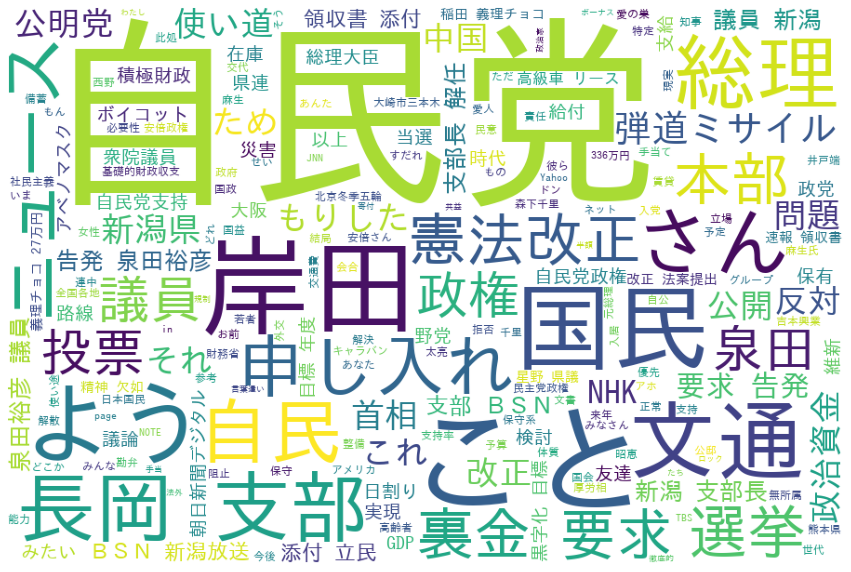

In [35]:
# WordCloudで出力するフォントを指定
font_path = "/usr/share/fonts/truetype/fonts-japanese-gothic.ttf"

# ストップワードの設定　※これは検索キーワードによって除外したほうがいい単語を設定
stop_words = [ 'https','OracleInnovation' ,'Innovation','Oracle','co','the','of','Summit','Tokyo','Japan','RT',u'説明',u'データ',u'する',u'オラクル',u'日本',u'提供',u'開催',u'お客様']

#解析単語の指定、ストップワードの設定、背景色は白
wordcloud = WordCloud(background_color="white", font_path=font_path, stopwords=set(stop_words),width=900,height=600).generate(words_text)

# ワードクラウドを表示
plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### ⑥ ワードカウント（ストップワードのチェック）

In [36]:
from collections import Counter

In [37]:
# Counterの引数はリストを指定！
print(words_list_flat)

['わたし', '自民党', '人', 'ロック', '言葉遣い', '徹底的', '規制', '政治家', 'たち', '解決', '自民党', 'ボーナス', '法外', '手当', '半額', '等', '寄付', '国益', '自民党政権', '共益', '観点', '判断', '参加', '細野豪志', '衆院議員', '静岡', '５', '区', '県連', '入り', '事実上', '容認', '自民党', '静岡県', '連', 'Daiichi', 'TV', '静岡第一テレビ', 'そうそう', '自民党', '9条', '徴兵', '敵基地攻撃', 'の', 'アメリカ', 'ため', '自民党', '反社会的勢力', 'こと', '証明', '曝', '発言', '続出', '続発', '自民党', '新潟県', '議', '星野伊佐夫', '大阪', '自民党', '全敗', '地方議員', '大阪', '自民党', '様', '泉', '立憲民主党', '此', '評価', '裏金', '要求', '告発', '泉田裕彦', '議員', '新潟', '５', '区', '支部長', '解任', '自民党', '長岡', '支部', 'ＢＳＮ', '新潟放送', 'ヤクザ', '集団', 'ゴロ', 'ツキ', '反対', '人', '県議会議員', '資格', '川勝平太', '口', '撃', '12月19日', 'JR東', '静岡駅', '前', '計画', '図書館', '整備', '予定', '施設', '文化', '力', '拠点', '来年度', '予算', '以下', '給付', '一', 'ヶ月', '18歳', '誕生日', 'マネ', '友達', '連中', 'こと', 'みんな', '来年', '時', '事', 'の', '総理大臣', '基礎的財政収支', '黒字化', '目標', '年度', '自民党', '内', '議論', '岸田', '首相', 'NHK', 'ニュース', 'もりした', '千里', '森下千里', 'もりした', 'NOTE', '二', '章', '−1', 'page', '自民党', '女性', '局', '井戸端', 'キャラバン', 'in', '大崎市三本木', '国民

In [38]:
# 各ワードの出現カウントの数値出力(カンマ区切り)
counter = Counter(words_list_flat)
print(counter)

Counter({'自民党': 95, 'の': 33, 'こと': 18, '岸田': 14, '議員': 13, '国民': 11, '費': 11, 'よう': 10, '文通': 9, '人': 8, '支部': 8, '事': 8, '内': 8, '総理': 8, '支部長': 7, '長岡': 7, '改正': 7, 'さん': 7, '日本': 7, '５': 6, '区': 6, '裏金': 6, '要求': 6, '告発': 6, '新潟': 6, '自民': 6, '党': 6, '申し入れ': 6, '領収書': 6, '憲法改正': 6, 'ん': 6, '本部': 6, '選挙': 6, 'ら': 5, '泉田': 5, '政権': 5, '投票': 5, '弾道ミサイル': 5, '連': 4, 'ため': 4, '新潟県': 4, '泉田裕彦': 4, '解任': 4, 'ＢＳＮ': 4, '新潟放送': 4, '反対': 4, '首相': 4, 'NHK': 4, 'ニュース': 4, 'もりした': 4, '政治資金': 4, '氏': 4, '何': 4, '公開': 4, '添付': 4, '立民': 4, '国': 4, '中国': 4, 'これ': 4, '使い道': 4, '問題': 4, '公明党': 4, 'それ': 4, '等': 3, '自民党政権': 3, '衆院議員': 3, '県連': 3, '大阪': 3, '様': 3, '給付': 3, '友達': 3, '時': 3, '総理大臣': 3, '黒字化': 3, '目標': 3, '年度': 3, '議論': 3, '高級車': 3, 'リース': 3, '稲田': 3, '義理チョコ': 3, '27万円': 3, '者': 3, '積極財政': 3, '愛': 3, '精神': 3, '欠如': 3, '朝日新聞デジタル': 3, '政党': 3, '速報': 3, '法案提出': 3, '系': 3, '日割り': 3, '支給': 3, '時代': 3, '当選': 3, 'アベノマスク': 3, 'ボイコット': 3, '検討': 3, 'GDP': 3, '災害': 3, 'みたい': 3, '在庫': 3, '千': 3, '万': 3,

In [39]:
# 数値を降順にして、ワードの上位ランキングを数値でもみてみる
print(sorted(counter.items(), key=lambda x:x[1], reverse=True))

[('自民党', 95), ('の', 33), ('こと', 18), ('岸田', 14), ('議員', 13), ('国民', 11), ('費', 11), ('よう', 10), ('文通', 9), ('人', 8), ('支部', 8), ('事', 8), ('内', 8), ('総理', 8), ('支部長', 7), ('長岡', 7), ('改正', 7), ('さん', 7), ('日本', 7), ('５', 6), ('区', 6), ('裏金', 6), ('要求', 6), ('告発', 6), ('新潟', 6), ('自民', 6), ('党', 6), ('申し入れ', 6), ('領収書', 6), ('憲法改正', 6), ('ん', 6), ('本部', 6), ('選挙', 6), ('ら', 5), ('泉田', 5), ('政権', 5), ('投票', 5), ('弾道ミサイル', 5), ('連', 4), ('ため', 4), ('新潟県', 4), ('泉田裕彦', 4), ('解任', 4), ('ＢＳＮ', 4), ('新潟放送', 4), ('反対', 4), ('首相', 4), ('NHK', 4), ('ニュース', 4), ('もりした', 4), ('政治資金', 4), ('氏', 4), ('何', 4), ('公開', 4), ('添付', 4), ('立民', 4), ('国', 4), ('中国', 4), ('これ', 4), ('使い道', 4), ('問題', 4), ('公明党', 4), ('それ', 4), ('等', 3), ('自民党政権', 3), ('衆院議員', 3), ('県連', 3), ('大阪', 3), ('様', 3), ('給付', 3), ('友達', 3), ('時', 3), ('総理大臣', 3), ('黒字化', 3), ('目標', 3), ('年度', 3), ('議論', 3), ('高級車', 3), ('リース', 3), ('稲田', 3), ('義理チョコ', 3), ('27万円', 3), ('者', 3), ('積極財政', 3), ('愛', 3), ('精神', 3), ('欠如', 3), ('朝日新聞デジタル

In [40]:
# 適さない単語をリストからカット（NGワードの駆逐）
words_list_flat2 = []
for w in words_list_flat:
    if w not in ['の', 'ん', 'これ', 'さん']:
        words_list_flat2.append(w)

In [41]:
# 各ワードの出現カウントの数値出力(カンマ区切り)
#--> NGワードの駆逐後
counter2 = Counter(words_list_flat2)
print(sorted(counter2.items(), key=lambda x:x[1], reverse=True))

[('自民党', 95), ('こと', 18), ('岸田', 14), ('議員', 13), ('国民', 11), ('費', 11), ('よう', 10), ('文通', 9), ('人', 8), ('支部', 8), ('事', 8), ('内', 8), ('総理', 8), ('支部長', 7), ('長岡', 7), ('改正', 7), ('日本', 7), ('５', 6), ('区', 6), ('裏金', 6), ('要求', 6), ('告発', 6), ('新潟', 6), ('自民', 6), ('党', 6), ('申し入れ', 6), ('領収書', 6), ('憲法改正', 6), ('本部', 6), ('選挙', 6), ('ら', 5), ('泉田', 5), ('政権', 5), ('投票', 5), ('弾道ミサイル', 5), ('連', 4), ('ため', 4), ('新潟県', 4), ('泉田裕彦', 4), ('解任', 4), ('ＢＳＮ', 4), ('新潟放送', 4), ('反対', 4), ('首相', 4), ('NHK', 4), ('ニュース', 4), ('もりした', 4), ('政治資金', 4), ('氏', 4), ('何', 4), ('公開', 4), ('添付', 4), ('立民', 4), ('国', 4), ('中国', 4), ('使い道', 4), ('問題', 4), ('公明党', 4), ('それ', 4), ('等', 3), ('自民党政権', 3), ('衆院議員', 3), ('県連', 3), ('大阪', 3), ('様', 3), ('給付', 3), ('友達', 3), ('時', 3), ('総理大臣', 3), ('黒字化', 3), ('目標', 3), ('年度', 3), ('議論', 3), ('高級車', 3), ('リース', 3), ('稲田', 3), ('義理チョコ', 3), ('27万円', 3), ('者', 3), ('積極財政', 3), ('愛', 3), ('精神', 3), ('欠如', 3), ('朝日新聞デジタル', 3), ('政党', 3), ('速報', 3), ('法案提出', 3), (

In [42]:
# ワードのリストをスペース区切りで連結
words_text2 = " ".join(words_list_flat2)
words_text2

'わたし 自民党 人 ロック 言葉遣い 徹底的 規制 政治家 たち 解決 自民党 ボーナス 法外 手当 半額 等 寄付 国益 自民党政権 共益 観点 判断 参加 細野豪志 衆院議員 静岡 ５ 区 県連 入り 事実上 容認 自民党 静岡県 連 Daiichi TV 静岡第一テレビ そうそう 自民党 9条 徴兵 敵基地攻撃 アメリカ ため 自民党 反社会的勢力 こと 証明 曝 発言 続出 続発 自民党 新潟県 議 星野伊佐夫 大阪 自民党 全敗 地方議員 大阪 自民党 様 泉 立憲民主党 此 評価 裏金 要求 告発 泉田裕彦 議員 新潟 ５ 区 支部長 解任 自民党 長岡 支部 ＢＳＮ 新潟放送 ヤクザ 集団 ゴロ ツキ 反対 人 県議会議員 資格 川勝平太 口 撃 12月19日 JR東 静岡駅 前 計画 図書館 整備 予定 施設 文化 力 拠点 来年度 予算 以下 給付 一 ヶ月 18歳 誕生日 マネ 友達 連中 こと みんな 来年 時 事 総理大臣 基礎的財政収支 黒字化 目標 年度 自民党 内 議論 岸田 首相 NHK ニュース もりした 千里 森下千里 もりした NOTE 二 章 −1 page 自民党 女性 局 井戸端 キャラバン in 大崎市三本木 国民 自民党 …。 政治資金 使い途 麻生氏 高級車 リース 336万円 稲田 氏 義理チョコ 27万円 小池百合子 都知事 拉致問題 解決 意欲 都庁 舎 ライトアップ 東スポ Web 2点 自民党 質疑 知事 答弁 納得 あんた ら ため 基礎的財政収支 黒字化 目標 年度 自民党 内 議論 岸田 首相 NHK ニュース ただ 人 石原伸晃 氏 内閣官房参与 議員 バッジ ウハウハ 自民党 うまみ 日刊ゲンダイ DIGITAL 頭 NTUY 竹中平蔵 陰謀論 者 自民党 パフォーマー 信者 人達 現実 模様 積極財政 末世 ポーズ 何 日 後 真逆 もの 藤井聡 西田 麻生 財務省 黒字化 目標 年度 自民党 内 議論 自民党 105 件 コメント 自民 長岡 支部 愛 党 精神 欠如 泉田 議員 支部長 交代 申し入れ 朝日新聞デジタル 210 users 自民党 ダメ 真の保守 政党 国政 日本第一党 新党 くに 期待 自民党 反対 文通 費 透明化 銀座 ツケ払い 公開 速報 領収書 添付 立民 文通 

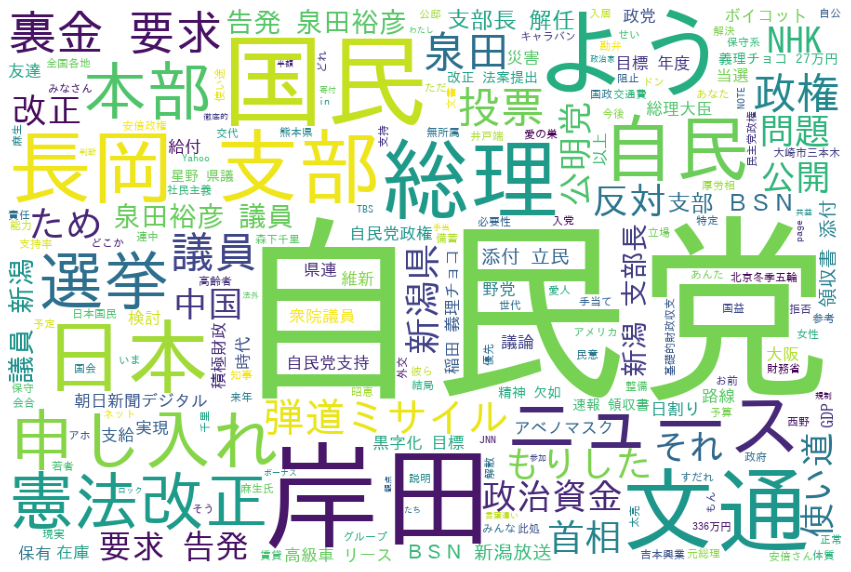

In [43]:
#--> NGワードの駆逐後のワードクラウド
#----> ワードクラウドの表示内容よくなるはず！

# WordCloudで出力するフォントを指定
font_path = "/usr/share/fonts/truetype/fonts-japanese-gothic.ttf"

# ストップワードの設定　※これは検索キーワードによって除外したほうがいい単語を設定
stop_words = [ 'みたい','もの' ,'こと','なのか','あれ', 'あ', 'とか']

#解析単語の指定、ストップワードの設定、背景色は白
wordcloud = WordCloud(background_color="white", font_path=font_path, stopwords=set(stop_words),width=900,height=600).generate(words_text2)

# ワードクラウドを表示
plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## ⑦ 共起ネットワークの作成

### 7-0. 共起データの作成

In [44]:
# Mecabを使用して、形態素解析
import MeCab

# 形態素解析器: ChaSen、辞書: 新語対応で有名なNeologd
# mecab = MeCab.Tagger("-Ochasen")
mecab =MeCab.Tagger('-Ochasen -d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd')

In [45]:
# 文単位の名詞リスト
words_list=[]

# 文単位の名詞リストを生成
for sentence in tw_data:
    # print(mecab.parse(sentence))
    # print(mecab.parse(sentence).splitlines())

    sw_list = []
    for v in mecab.parse(sentence).splitlines():
        # print(v.split())
        if (len(v.split())>=3 and v.split()[3][:2]=='名詞'):
            sw_list.append(v.split()[2])
            # print(sw_list)
            
    words_list.append(sw_list)

In [46]:
# 形態素解析の結果として、取得した「文単位の名詞リスト」を確認
print(words_list)

[['わたし', '自民党', '人', 'ロック', '言葉遣い', '徹底的', '規制', '政治家', 'たち'], ['解決', '自民党', 'ボーナス', '法外', '手当', '半額', '等', '寄付'], ['国益', '自民党政権', '共益', '観点', '判断', '参加'], ['細野豪志', '衆院議員', '静岡', '５', '区', '県連', '入り', '事実上', '容認', '自民党', '静岡県', '連', 'Daiichi', 'TV', '静岡第一テレビ'], ['そうそう', '自民党', '9条', '徴兵', '敵基地攻撃', 'の', 'アメリカ', 'ため'], ['自民党', '反社会的勢力', 'こと', '証明', '曝', '発言', '続出', '続発', '自民党', '新潟県', '議', '星野伊佐夫'], ['大阪', '自民党', '全敗', '地方議員', '大阪', '自民党', '様', '泉', '立憲民主党', '此', '評価'], ['裏金', '要求', '告発', '泉田裕彦', '議員', '新潟', '５', '区', '支部長', '解任', '自民党', '長岡', '支部', 'ＢＳＮ', '新潟放送'], ['ヤクザ', '集団', 'ゴロ', 'ツキ', '反対', '人', '県議会議員', '資格', '川勝平太', '口', '撃', '12月19日', 'JR東', '静岡駅', '前', '計画', '図書館', '整備', '予定', '施設', '文化', '力', '拠点', '来年度', '予算'], ['以下', '給付', '一', 'ヶ月', '18歳', '誕生日', 'マネ', '友達', '連中', 'こと', 'みんな', '来年', '時'], ['事', 'の', '総理大臣', '基礎的財政収支', '黒字化', '目標', '年度', '自民党', '内', '議論', '岸田', '首相', 'NHK', 'ニュース'], ['もりした', '千里', '森下千里', 'もりした', 'NOTE', '二', '章', '−1', 'page', '自民党', '女性', '局', '井戸端', 'キャラバ

### 7-1. 共起データの生成

共起データ:  共起単語のペアと出現頻度からなる辞書型オブジェクト

※共起: 対象とする単位（文）の中で単語が共に出現する回数をカウント

In [47]:
import itertools

In [48]:
# 適さない単語をリストからカット（NGワードの駆逐）
words_list2 = []

for s in words_list:
    w_list2 = []
    for w in s:
        # ★WordCloud作成時にチェックしたNGワードを記述
        if w not in ['の', 'ん', 'これ', 'さん', 'みたい','もの' ,'こと','なのか','あれ', 'あ', 'とか']:
            w_list2.append(w)
    words_list2.append(w_list2)

print(words_list2)

[['わたし', '自民党', '人', 'ロック', '言葉遣い', '徹底的', '規制', '政治家', 'たち'], ['解決', '自民党', 'ボーナス', '法外', '手当', '半額', '等', '寄付'], ['国益', '自民党政権', '共益', '観点', '判断', '参加'], ['細野豪志', '衆院議員', '静岡', '５', '区', '県連', '入り', '事実上', '容認', '自民党', '静岡県', '連', 'Daiichi', 'TV', '静岡第一テレビ'], ['そうそう', '自民党', '9条', '徴兵', '敵基地攻撃', 'アメリカ', 'ため'], ['自民党', '反社会的勢力', '証明', '曝', '発言', '続出', '続発', '自民党', '新潟県', '議', '星野伊佐夫'], ['大阪', '自民党', '全敗', '地方議員', '大阪', '自民党', '様', '泉', '立憲民主党', '此', '評価'], ['裏金', '要求', '告発', '泉田裕彦', '議員', '新潟', '５', '区', '支部長', '解任', '自民党', '長岡', '支部', 'ＢＳＮ', '新潟放送'], ['ヤクザ', '集団', 'ゴロ', 'ツキ', '反対', '人', '県議会議員', '資格', '川勝平太', '口', '撃', '12月19日', 'JR東', '静岡駅', '前', '計画', '図書館', '整備', '予定', '施設', '文化', '力', '拠点', '来年度', '予算'], ['以下', '給付', '一', 'ヶ月', '18歳', '誕生日', 'マネ', '友達', '連中', 'みんな', '来年', '時'], ['事', '総理大臣', '基礎的財政収支', '黒字化', '目標', '年度', '自民党', '内', '議論', '岸田', '首相', 'NHK', 'ニュース'], ['もりした', '千里', '森下千里', 'もりした', 'NOTE', '二', '章', '−1', 'page', '自民党', '女性', '局', '井戸端', 'キャラバン', 'in', '大崎市三本木'], [

In [49]:
# 文単位の 名詞ペアリスト
pair_list = []

# ★文単位の名詞ペアリストを生成
#--> 隣り合った単語の組をデータの単位（2-gram(2単語)）
for n in words_list2:
    # print(n, len(n))
    if len(n) >=2:
        pair_list.append(list(itertools.combinations(n, 2)))

In [50]:
print(pair_list)

[[('わたし', '自民党'), ('わたし', '人'), ('わたし', 'ロック'), ('わたし', '言葉遣い'), ('わたし', '徹底的'), ('わたし', '規制'), ('わたし', '政治家'), ('わたし', 'たち'), ('自民党', '人'), ('自民党', 'ロック'), ('自民党', '言葉遣い'), ('自民党', '徹底的'), ('自民党', '規制'), ('自民党', '政治家'), ('自民党', 'たち'), ('人', 'ロック'), ('人', '言葉遣い'), ('人', '徹底的'), ('人', '規制'), ('人', '政治家'), ('人', 'たち'), ('ロック', '言葉遣い'), ('ロック', '徹底的'), ('ロック', '規制'), ('ロック', '政治家'), ('ロック', 'たち'), ('言葉遣い', '徹底的'), ('言葉遣い', '規制'), ('言葉遣い', '政治家'), ('言葉遣い', 'たち'), ('徹底的', '規制'), ('徹底的', '政治家'), ('徹底的', 'たち'), ('規制', '政治家'), ('規制', 'たち'), ('政治家', 'たち')], [('解決', '自民党'), ('解決', 'ボーナス'), ('解決', '法外'), ('解決', '手当'), ('解決', '半額'), ('解決', '等'), ('解決', '寄付'), ('自民党', 'ボーナス'), ('自民党', '法外'), ('自民党', '手当'), ('自民党', '半額'), ('自民党', '等'), ('自民党', '寄付'), ('ボーナス', '法外'), ('ボーナス', '手当'), ('ボーナス', '半額'), ('ボーナス', '等'), ('ボーナス', '寄付'), ('法外', '手当'), ('法外', '半額'), ('法外', '等'), ('法外', '寄付'), ('手当', '半額'), ('手当', '等'), ('手当', '寄付'), ('半額', '等'), ('半額', '寄付'), ('等', '寄付')], [('国益', '自民党政権'), ('国益', '共益'), ('国益'

In [51]:
# 名詞ペアリストの平坦化
all_pairs = []

for u in pair_list:
    all_pairs.extend(u)

In [52]:
# 名詞ペアの頻度をカウント
cnt_pairs = Counter(all_pairs)
print(cnt_pairs)

Counter({('自民党', '費'): 11, ('文通', '費'): 11, ('自民党', '自民党'): 9, ('議員', '自民党'): 9, ('自民党', '文通'): 9, ('自民党', '支部'): 8, ('自民党', '内'): 8, ('自民党', '長岡'): 7, ('長岡', '支部'): 7, ('岸田', '総理'): 7, ('岸田', '自民党'): 7, ('５', '区'): 6, ('裏金', '要求'): 6, ('議員', '支部長'): 6, ('自民党', '岸田'): 6, ('国民', '自民党'): 6, ('弾道ミサイル', '保有'): 6, ('自民党', '選挙'): 6, ('自民党', '国民'): 6, ('自民党', '人'): 5, ('５', '自民党'): 5, ('区', '自民党'): 5, ('大阪', '自民党'): 5, ('自民党', '様'): 5, ('裏金', '告発'): 5, ('裏金', '新潟'): 5, ('裏金', '自民党'): 5, ('要求', '告発'): 5, ('要求', '新潟'): 5, ('要求', '自民党'): 5, ('告発', '議員'): 5, ('告発', '新潟'): 5, ('告発', '支部長'): 5, ('告発', '自民党'): 5, ('告発', '長岡'): 5, ('告発', '支部'): 5, ('泉田裕彦', '新潟'): 5, ('議員', '新潟'): 5, ('新潟', '自民党'): 5, ('５', '支部長'): 5, ('区', '支部長'): 5, ('自民党', '議員'): 5, ('自民党', '改正'): 5, ('文通', '改正'): 5, ('文通', '法案提出'): 5, ('費', '改正'): 5, ('費', '法案提出'): 5, ('領収書', '改正'): 5, ('添付', '改正'): 5, ('立民', '改正'): 5, ('自民党', 'よう'): 5, ('よう', '自民党'): 5, ('自民党', '総理'): 5, ('自民党', '弾道ミサイル'): 5, ('自民党', '事'): 5, ('自民党', '連'): 4, ('自

### 7-2. ネットワーク作図用データの作成

In [53]:
import numpy as np

In [54]:
# 作図にあたって見た目を簡潔にするために要素を絞り込む
#--> 出現頻度で上位50組のリストを生成
tops = sorted(cnt_pairs.items(), key=lambda x: x[1], reverse=True)[:50]
tops

[(('自民党', '費'), 11),
 (('文通', '費'), 11),
 (('自民党', '自民党'), 9),
 (('議員', '自民党'), 9),
 (('自民党', '文通'), 9),
 (('自民党', '支部'), 8),
 (('自民党', '内'), 8),
 (('自民党', '長岡'), 7),
 (('長岡', '支部'), 7),
 (('岸田', '総理'), 7),
 (('岸田', '自民党'), 7),
 (('５', '区'), 6),
 (('裏金', '要求'), 6),
 (('議員', '支部長'), 6),
 (('自民党', '岸田'), 6),
 (('国民', '自民党'), 6),
 (('弾道ミサイル', '保有'), 6),
 (('自民党', '選挙'), 6),
 (('自民党', '国民'), 6),
 (('自民党', '人'), 5),
 (('５', '自民党'), 5),
 (('区', '自民党'), 5),
 (('大阪', '自民党'), 5),
 (('自民党', '様'), 5),
 (('裏金', '告発'), 5),
 (('裏金', '新潟'), 5),
 (('裏金', '自民党'), 5),
 (('要求', '告発'), 5),
 (('要求', '新潟'), 5),
 (('要求', '自民党'), 5),
 (('告発', '議員'), 5),
 (('告発', '新潟'), 5),
 (('告発', '支部長'), 5),
 (('告発', '自民党'), 5),
 (('告発', '長岡'), 5),
 (('告発', '支部'), 5),
 (('泉田裕彦', '新潟'), 5),
 (('議員', '新潟'), 5),
 (('新潟', '自民党'), 5),
 (('５', '支部長'), 5),
 (('区', '支部長'), 5),
 (('自民党', '議員'), 5),
 (('自民党', '改正'), 5),
 (('文通', '改正'), 5),
 (('文通', '法案提出'), 5),
 (('費', '改正'), 5),
 (('費', '法案提出'), 5),
 (('領収書', '改正'), 5),
 (('添付', '改正

In [55]:
noun_1 = []
noun_2 = []
frequency = []

# 重み付きデータの生成
for n,f in tops:
    noun_1.append(n[0])    
    noun_2.append(n[1])
    frequency.append(f)

# データフレームの作成
df = pd.DataFrame({'前出名詞': noun_1, '後出名詞': noun_2, '出現頻度': frequency})

# 重み付きデータの設定（Pandas→Array変換）
weighted_edges = np.array(df)
weighted_edges

array([['自民党', '費', 11],
       ['文通', '費', 11],
       ['自民党', '自民党', 9],
       ['議員', '自民党', 9],
       ['自民党', '文通', 9],
       ['自民党', '支部', 8],
       ['自民党', '内', 8],
       ['自民党', '長岡', 7],
       ['長岡', '支部', 7],
       ['岸田', '総理', 7],
       ['岸田', '自民党', 7],
       ['５', '区', 6],
       ['裏金', '要求', 6],
       ['議員', '支部長', 6],
       ['自民党', '岸田', 6],
       ['国民', '自民党', 6],
       ['弾道ミサイル', '保有', 6],
       ['自民党', '選挙', 6],
       ['自民党', '国民', 6],
       ['自民党', '人', 5],
       ['５', '自民党', 5],
       ['区', '自民党', 5],
       ['大阪', '自民党', 5],
       ['自民党', '様', 5],
       ['裏金', '告発', 5],
       ['裏金', '新潟', 5],
       ['裏金', '自民党', 5],
       ['要求', '告発', 5],
       ['要求', '新潟', 5],
       ['要求', '自民党', 5],
       ['告発', '議員', 5],
       ['告発', '新潟', 5],
       ['告発', '支部長', 5],
       ['告発', '自民党', 5],
       ['告発', '長岡', 5],
       ['告発', '支部', 5],
       ['泉田裕彦', '新潟', 5],
       ['議員', '新潟', 5],
       ['新潟', '自民党', 5],
       ['５', '支部長', 5],
       ['区', '支部長

### 7-3. ネットワーク図の描画

In [56]:
# 可視化ライブラリのインポート
# NetworkX:  Pythonで複雑なネットワークやグラフ構造を作成・操作するためのパッケージ
# --> ネットワーク図:  頂点のことをノード(node)、頂点同士を連結する辺をエッジ(edge)
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline 

In [57]:
# matplotlibを日本語表示に対応させるモジュール
# ネットワーク図のノードのラベルを日本語で表示するために必要（さらに日本語フォントを指定する必要があり）
!pip install japanize_matplotlib 
import japanize_matplotlib

     |████████████████████████████████| 4.1 MB 24.5 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120274 sha256=d946c3369520755bea3a6434d5b58f7ff060b5976217fd5f249d34b16e0f8669
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


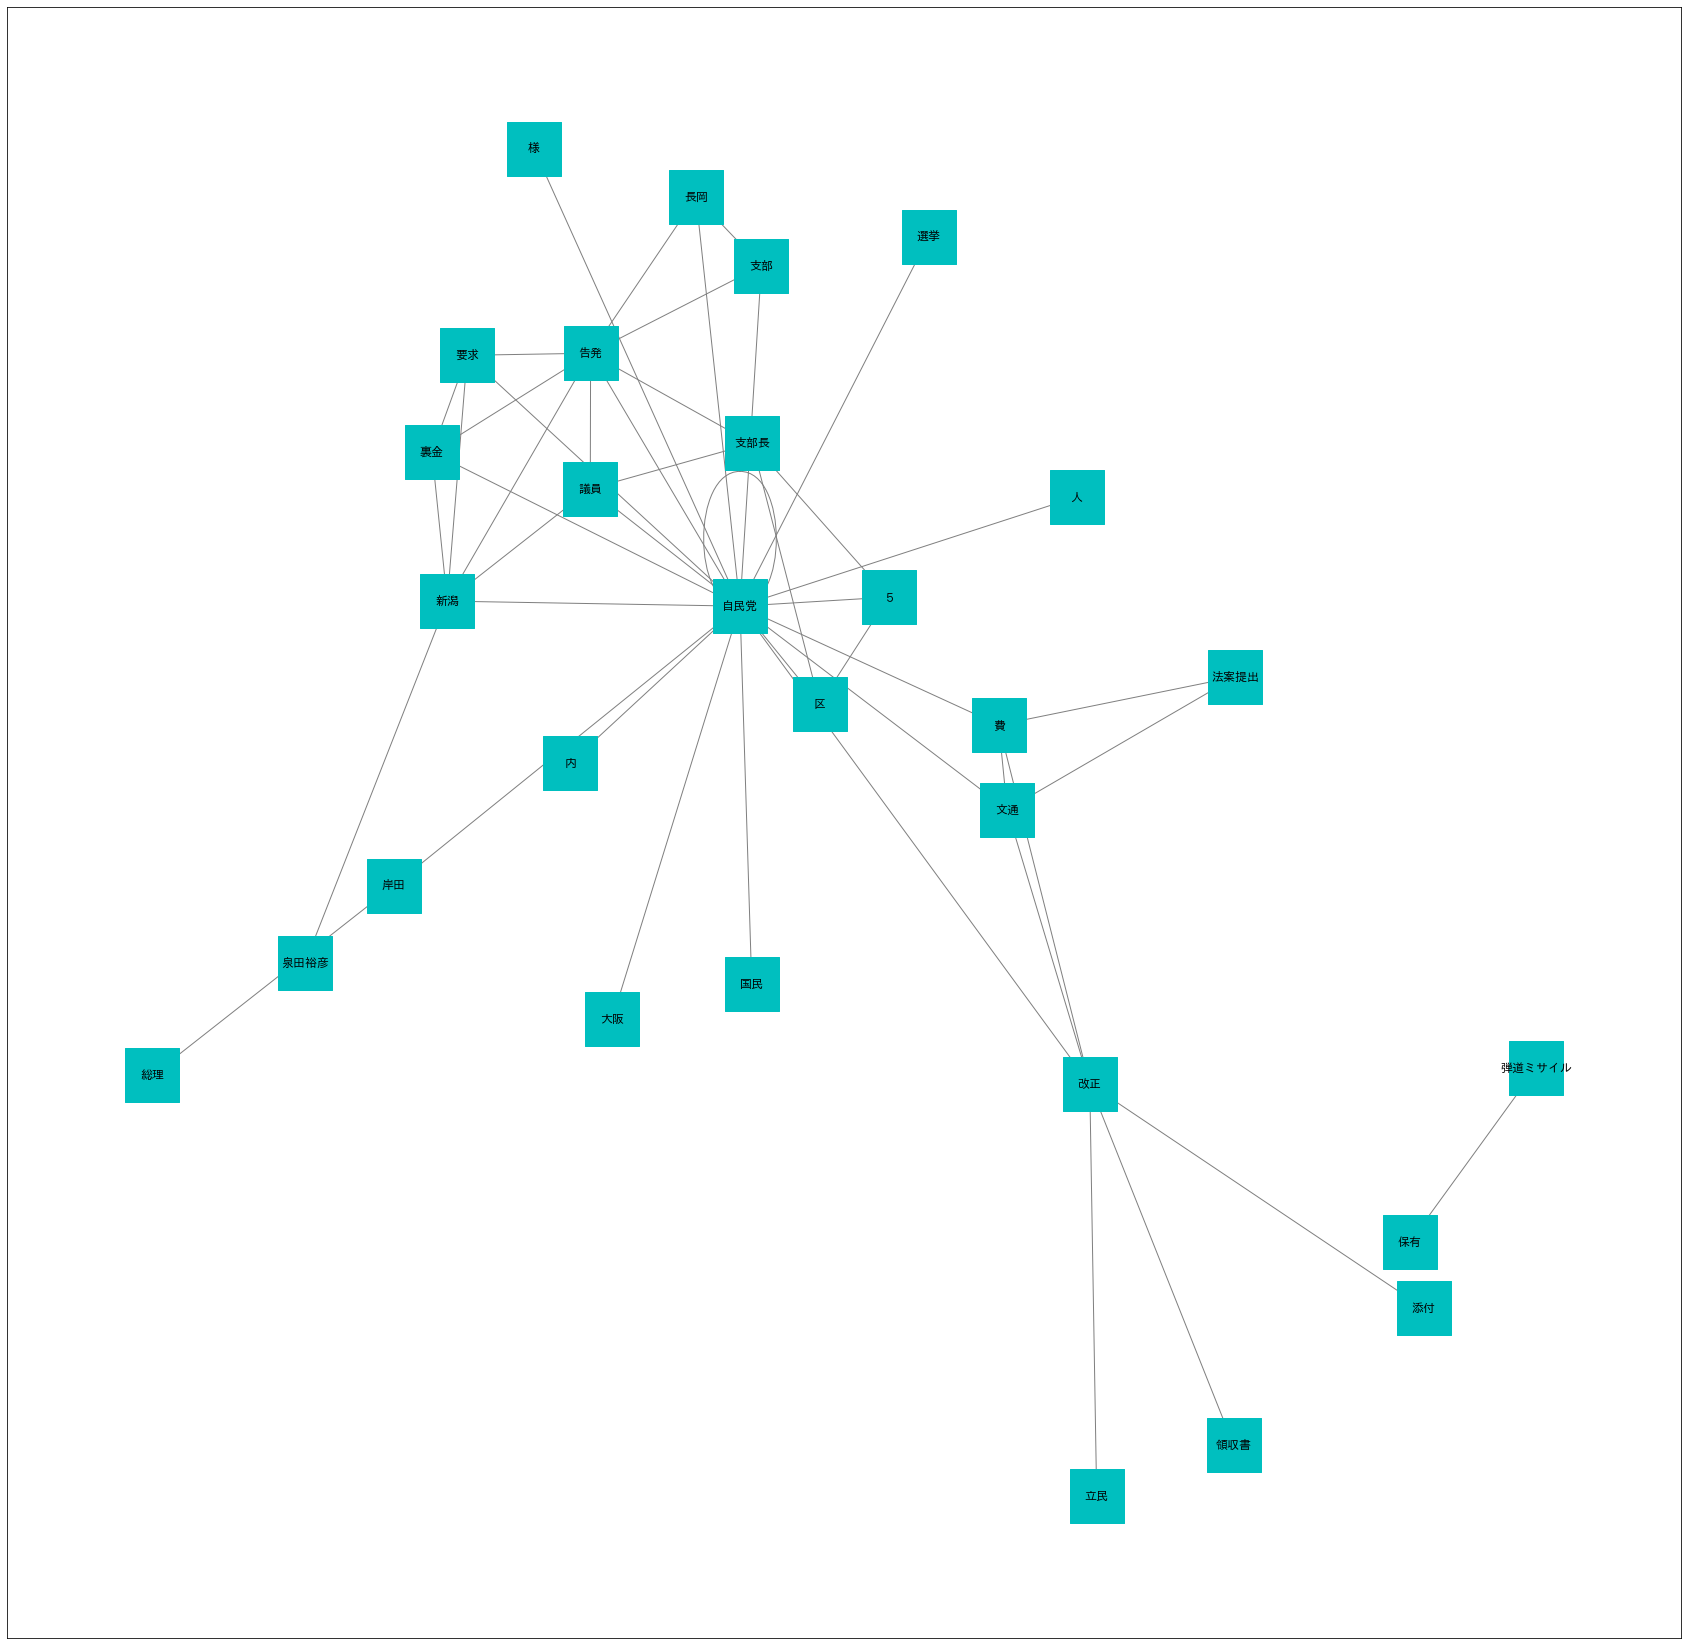

In [62]:
# NetworkXでの可視化
# グラフオブジェクトの生成
G = nx.Graph()

# 重み付きデータの読み込み
G.add_weighted_edges_from(weighted_edges)

# ネットワーク図の描画
plt.figure(figsize=(30,30))

#図のレイアウトを決める。kの値が小さい程図が密集する
pos = nx.spring_layout(G, k=0.9)

nx.draw_networkx(G,
                 pos,
                 with_labels = True, 
                 node_shape = "s",
                 node_color = "c", 
                 node_size = 3000,
                 edge_color = "gray", 
                 font_family = "IPAexGothic") # フォント指定

plt.show()

### ★NetworkXグラフの調整（edgeの剪定、nodeの大きさ、エッジの太さ）

-  2-gramの出現頻度が小さいedgeを剪定する（nodeをつなく線:edgeの削除）
- nodeの大きさをPageRankによって変える（PageRankアルゴリズムはNetworkXに実装されている）
- edgeの太さを2-gramの出現頻度によって変える

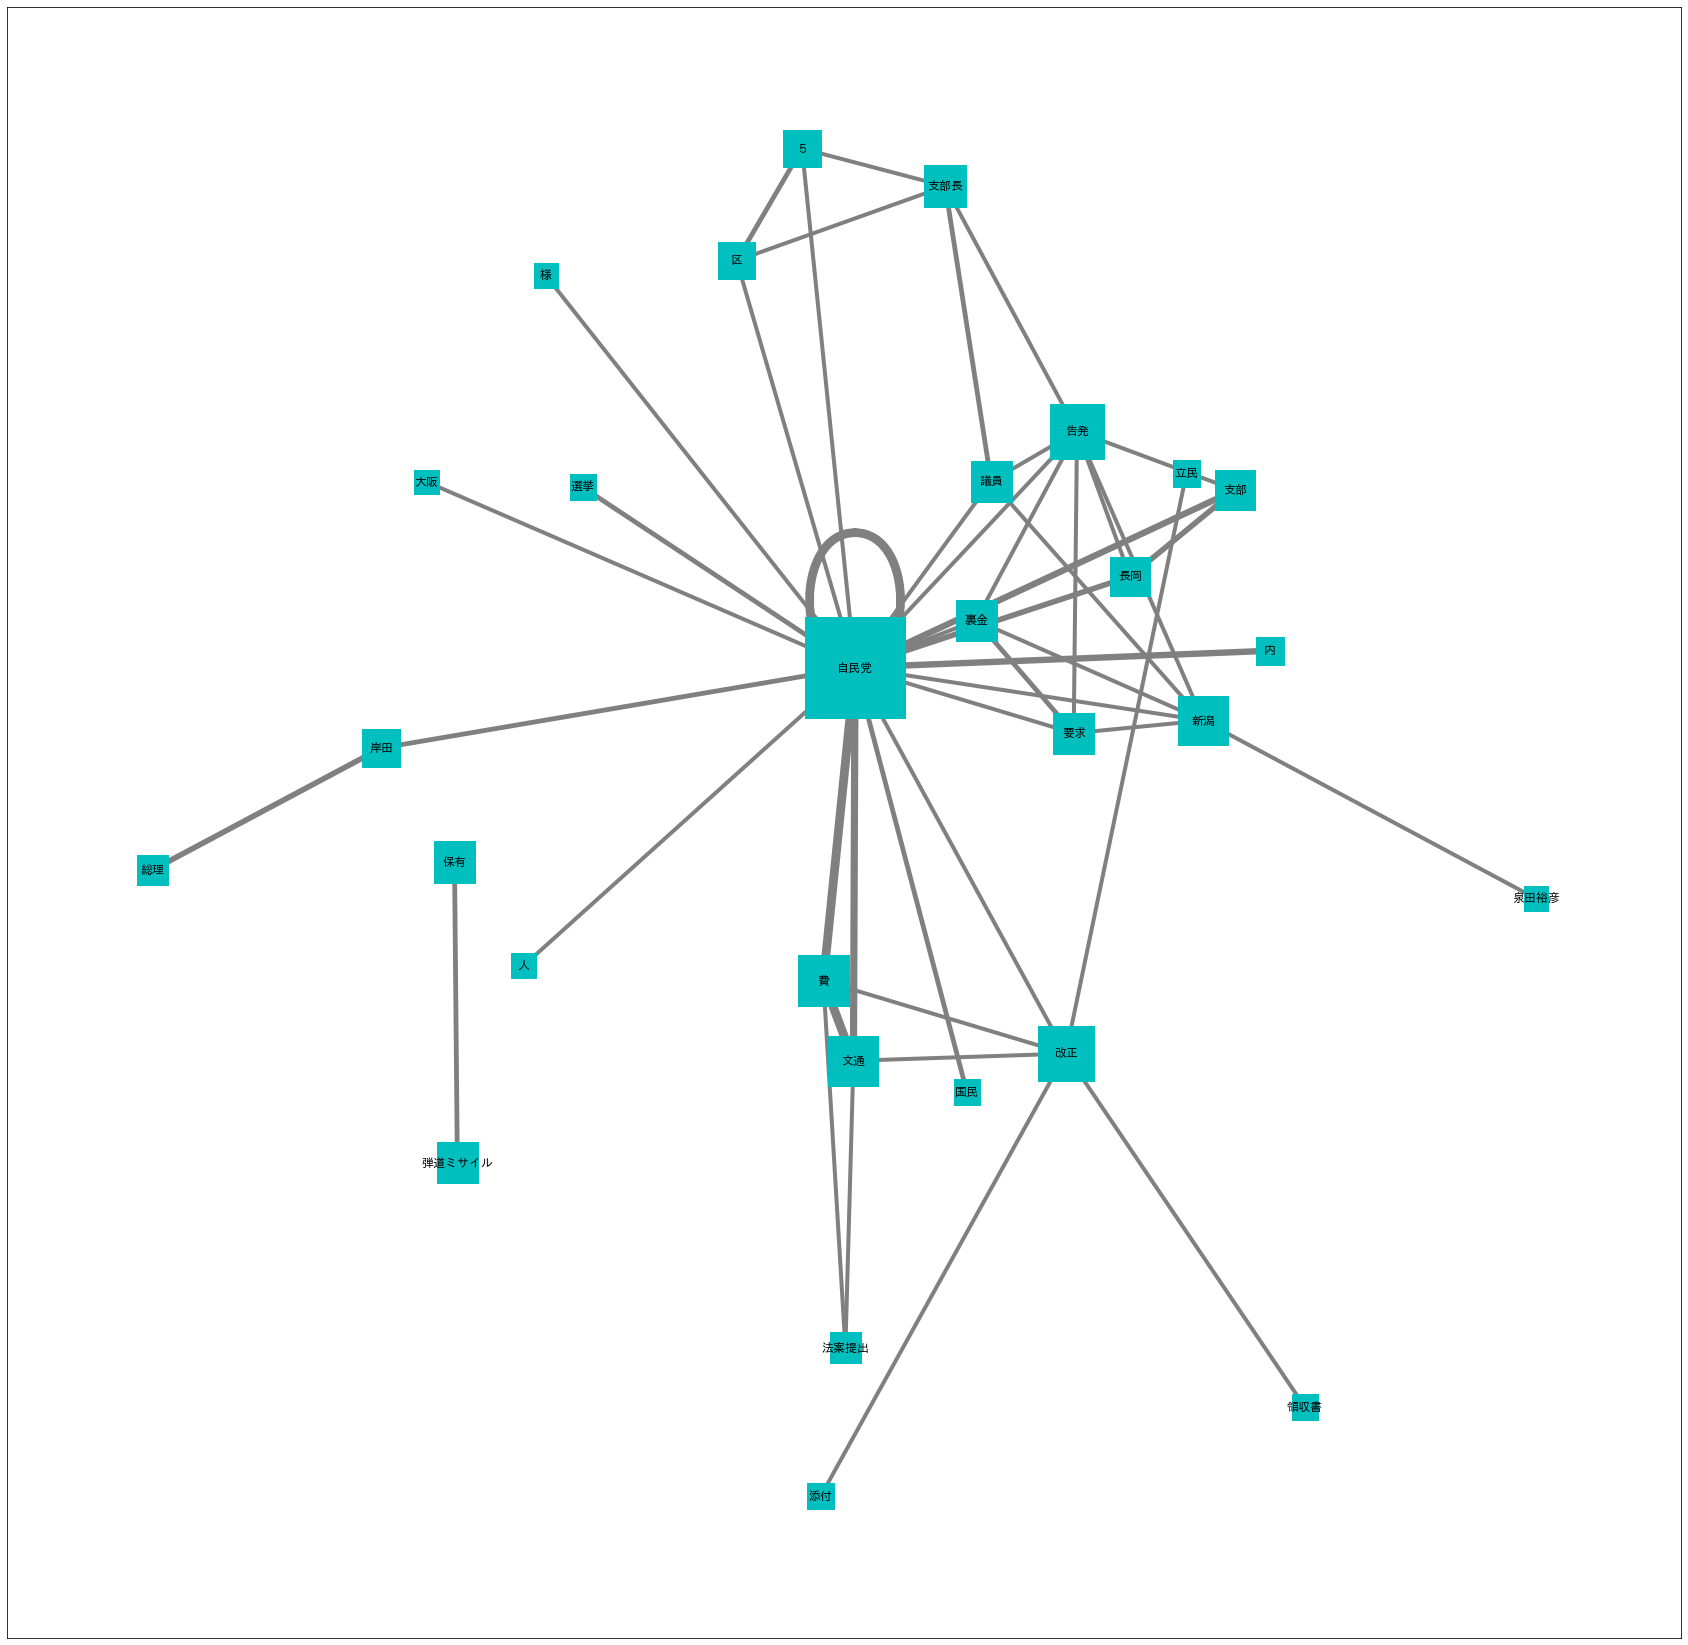

In [63]:
#############################################
# ★NetworkXグラフ調整パラメータ設定#1（Edgeの削除）
#
# 2-gramの出現頻度が、7以下は非表示とする（weight 7以下のedgeを削除）
removeEdges = [] #空のリスト

for (u, v, d) in G.edges(data=True):
 if d["weight"] <= 4:
   removeEdges.append([u,v]) #weightが8以下ならremoveEdgesに追加

# グラフから削除
G.remove_edges_from(removeEdges)


#############################################
# ★NetworkXグラフ調整パラメータ設定#2（Nodeの大きさ、Edgeeの太さ、グラフの密集度）
#
# nodeの大きさサイズをPagerankで調整
pr = nx.pagerank(G)

# weightによって線の太さを変える
edge_width = [d["weight"] * 0.8 for (u, v, d) in G.edges(data=True)]

# posを定義（kの値が小さい程図が密集する）
pos = nx.spring_layout(G, k=1.2)  # k = node間反発係数
#############################################

# ネットワーク図の描画
plt.figure(figsize=(30,30))

# 図示
nx.draw_networkx(G,
                 pos,
                 with_labels = True, 
                 node_shape = "s",
                 node_color = "c", 
                 # node_size = 3000,
                 node_size=[50000*v for v in pr.values()],
                 width=edge_width,
                 edge_color = "gray", 
                 font_family = "IPAexGothic") # フォント指定